<a href="https://colab.research.google.com/github/darkginka/Data-Analyst/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/dataset/application_data.csv")

In [ ]:
df.shape

(307511, 122)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.describe

<bound method NDFrame.describe of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      

In [ ]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [ ]:
#Filter data
df['NAME_CONTRACT_TYPE']=="Cash loans"
# df[df['NAME_CONTRACT_TYPE']=="Cash loans"].head()

0          True
1          True
2         False
3          True
4          True
          ...  
307506     True
307507     True
307508     True
307509     True
307510     True
Name: NAME_CONTRACT_TYPE, Length: 307511, dtype: bool

In [ ]:
# If axis is not defined then It is along rows i.e. axis = 0
# df.dropna(inplace = True)
  
# if axis is equal to 1 i.e Column
# df.dropna(axis = 1, inplace = True)

In [ ]:
#unique values
# df['NAME_CONTRACT_TYPE'].unique()
df['WEEKDAY_APPR_PROCESS_START'].unique()

array(['WEDNESDAY', 'MONDAY', 'THURSDAY', 'SUNDAY', 'SATURDAY', 'FRIDAY',
       'TUESDAY'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


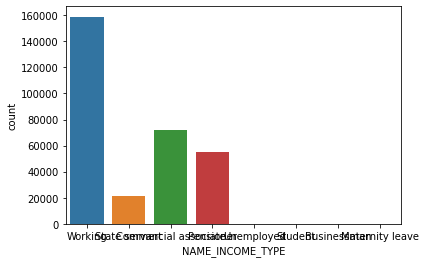

In [ ]:
#Plot the unique values
sns.countplot(df['NAME_INCOME_TYPE'])

In [ ]:
columns_to_drop=[]
#drop the column who is less corr
for i in range(2,22):
    columns_to_drop.append("FLAG_DOCUMENT_"+str(i))

In [ ]:
df=df.drop(columns_to_drop,axis=1)

In [ ]:
#Find null values
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 102, dtype: int64

In [ ]:
high_null_value_col=['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','OCCUPATION_TYPE',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR','NONLIVINGAREA_MEDI','OWN_CAR_AGE',
       'FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']

for i in high_null_value_col:
    df=df.drop(i,axis=1)

In [ ]:
#drop column who have less information
col=['APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI','EXT_SOURCE_1','EXT_SOURCE_2', 'EXT_SOURCE_3',]

for i in col:
    columns_to_drop.append(i)

In [ ]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.1250,0.0375,0.0205,0.0193,0.0000,2.0,2.0,2.0,2.0,-1134.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.3333,0.0132,0.0787,0.0558,0.0039,1.0,0.0,1.0,0.0,-828.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.2708,0.0605,0.1509,0.2001,0.0757,0.0,0.0,0.0,0.0,-273.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.1250,0.0589,0.0205,0.0261,0.0000,0.0,0.0,0.0,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.2083,NaN,0.0855,0.9445,0.0000,6.0,0.0,6.0,0.0,-1909.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,NaN,NaN,NaN,0.0062,NaN,0.0,0.0,0.0,0.0,-322.0


In [ ]:
#drop column contains string object to determine which is correalted o eacch other
df_str = df.select_dtypes(include=['object'])
df=df.drop(df_str.columns,axis=1)

In [ ]:
df

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0.1250,0.0375,0.0205,0.0193,0.0000,2.0,2.0,2.0,2.0,-1134.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0.3333,0.0132,0.0787,0.0558,0.0039,1.0,0.0,1.0,0.0,-828.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0.2708,0.0605,0.1509,0.2001,0.0757,0.0,0.0,0.0,0.0,-273.0
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0.1250,0.0589,0.0205,0.0261,0.0000,0.0,0.0,0.0,0.0,0.0
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0.2083,NaN,0.0855,0.9445,0.0000,6.0,0.0,6.0,0.0,-1909.0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,NaN,NaN,NaN,0.0062,NaN,0.0,0.0,0.0,0.0,-322.0


In [ ]:
# value function will be applied on every column
# df= df.fillna(value = df.mean(), inplace = True)
#filling value of one column
# df["AMT_INCOME_TOTAL"].fillna(0, inplace = True)
# df['AMT_INCOME_TOTAL'].fillna(value = df['AMT_INCOME_TOTAL'].mean(),inplace = True)
 
# #value function will be applied on every row
# df.loc[df.AMT_INCOME_TOTAL == "", 'AMT_INCOME_TOTAL'] =0

# # modify value in column AMT_ANNUITY where AMT_ANNUITY is 0
# df.loc[df.AMT_ANNUITY == 0, 'AMT_ANNUITY'] =df['AMT_ANNUITY'].mean()

                                                                 OR                                                                 

In [ ]:
#Replace null values
# df.replace(np.nan,'0',inplace = True)
# #Check the changes now
# df.isnull().sum()

In [ ]:
df

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0.1250,0.0375,0.0205,0.0193,0.0000,2.0,2.0,2.0,2.0,-1134.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0.3333,0.0132,0.0787,0.0558,0.0039,1.0,0.0,1.0,0.0,-828.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0.2708,0.0605,0.1509,0.2001,0.0757,0.0,0.0,0.0,0.0,-273.0
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0.1250,0.0589,0.0205,0.0261,0.0000,0.0,0.0,0.0,0.0,0.0
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0.2083,NaN,0.0855,0.9445,0.0000,6.0,0.0,6.0,0.0,-1909.0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,NaN,NaN,NaN,0.0062,NaN,0.0,0.0,0.0,0.0,-322.0


In [ ]:
df.groupby(['AMT_INCOME_TOTAL']).max()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
AMT_INCOME_TOTAL,,,,,,,,,,,,,,,,,,,,,
25650.0,124157,1,0,2173500.0,48118.5,2173500.0,0.035792,-17813,365243,-1669.0,...,NaN,NaN,NaN,0.0521,NaN,2.0,1.0,2.0,0.0,0.0
26100.0,384810,0,0,173092.5,12438.0,157500.0,0.022800,-20904,365243,-4469.0,...,NaN,NaN,NaN,NaN,NaN,3.0,0.0,3.0,0.0,-557.0
26460.0,253920,0,0,101880.0,6763.5,90000.0,0.018209,-20695,365243,-12907.0,...,NaN,NaN,NaN,0.0109,NaN,0.0,0.0,0.0,0.0,-271.0
26550.0,404212,0,2,571500.0,16281.0,571500.0,0.007120,-15260,365243,-1057.0,...,NaN,NaN,NaN,NaN,NaN,5.0,0.0,5.0,0.0,-418.0
27000.0,452627,1,2,900000.0,32337.0,900000.0,0.035792,-8873,365243,-257.0,...,0.5,0.2464,0.1753,0.2528,0.0427,9.0,2.0,9.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750000.0,252084,0,0,790830.0,52978.5,675000.0,0.009549,-19341,-443,-7414.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-695.0
9000000.0,190160,0,0,1431531.0,132601.5,1377000.0,0.010147,-16425,-8476,-7276.0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-3.0
13500000.0,385674,0,0,1400503.5,130945.5,1368000.0,0.030755,-13551,-280,-3953.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-13.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


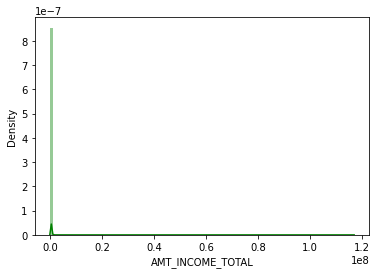

In [ ]:
plt.figure()
sns.distplot(df['AMT_INCOME_TOTAL'], color='g', bins=100, hist_kws={'alpha': 0.41})

In [ ]:
# Replace Data Types to Integer
# df["AMT_INCOME_TOTAL"] = df["AMT_INCOME_TOTAL"].astype('int')
# df["AMT_CREDIT"] = df["AMT_CREDIT"].astype('int')

# Replace Data Types to Float
# df["AMT_ANNUITY"] = df["AMT_ANNUITY"].astype('float')

# Replace Data Types to String
# df["Customer Number"] = df['Customer Number'].astype('str')

# Replace Data Types to Boolean
# df["IsPurchased"] = df['IsPurchased'].astype('bool')

# Replace Data Types to Datetime with format= '%Y%m%d'
# df['Dates'] = pd.to_datetime(df['Dates'], format='%Y%m%d')

In [ ]:
df_num = df.select_dtypes(include=['float','int'])
df_num

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0.1250,0.0375,0.0205,0.0193,0.0000,2.0,2.0,2.0,2.0,-1134.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0.3333,0.0132,0.0787,0.0558,0.0039,1.0,0.0,1.0,0.0,-828.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0.2708,0.0605,0.1509,0.2001,0.0757,0.0,0.0,0.0,0.0,-273.0
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0.1250,0.0589,0.0205,0.0261,0.0000,0.0,0.0,0.0,0.0,0.0
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0.2083,NaN,0.0855,0.9445,0.0000,6.0,0.0,6.0,0.0,-1909.0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,NaN,NaN,NaN,0.0062,NaN,0.0,0.0,0.0,0.0,-322.0


In [ ]:
df_num_corr = df_num.corr()['AMT_INCOME_TOTAL'][:-1] 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False) 
print("There are {} strongly correlated values with AMT_INCOME_TOTAL:\n{}".format(len(golden_features_list), golden_features_list)) 

There are 1 strongly correlated values with AMT_INCOME_TOTAL:
AMT_INCOME_TOTAL    1.0
Name: AMT_INCOME_TOTAL, dtype: float64


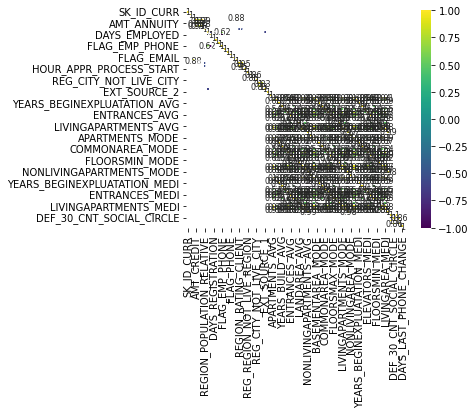

In [ ]:
corr = df_num.drop('AMT_INCOME_TOTAL', axis=1).corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], cmap='viridis', vmax=1.0, vmin=-1.0 ,linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True)

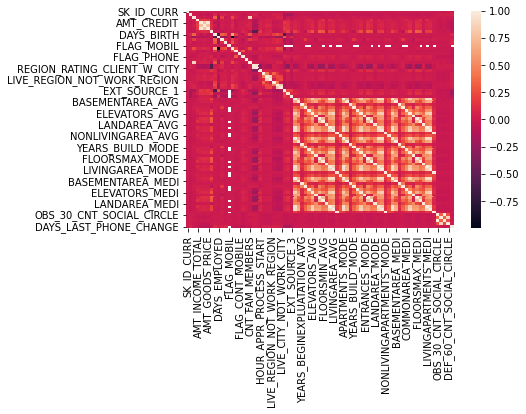

In [ ]:
# df.corr()
#Correlation plot
sns.heatmap(df.corr())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 77 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   CNT_CHILDREN                  307511 non-null  int64  
 3   AMT_INCOME_TOTAL              307511 non-null  float64
 4   AMT_CREDIT                    307511 non-null  float64
 5   AMT_ANNUITY                   307499 non-null  float64
 6   AMT_GOODS_PRICE               307233 non-null  float64
 7   REGION_POPULATION_RELATIVE    307511 non-null  float64
 8   DAYS_BIRTH                    307511 non-null  int64  
 9   DAYS_EMPLOYED                 307511 non-null  int64  
 10  DAYS_REGISTRATION             307511 non-null  float64
 11  DAYS_ID_PUBLISH               307511 non-null  int64  
 12  FLAG_MOBIL                    307511 non-nul

In [ ]:
#Extract field that can use for indexing
df2 = df[['SK_ID_CURR','TARGET']]
print(df2)

        SK_ID_CURR  TARGET
0           100002       1
1           100003       0
2           100004       0
3           100006       0
4           100007       0
...            ...     ...
307506      456251       0
307507      456252       0
307508      456253       0
307509      456254       1
307510      456255       0

[307511 rows x 2 columns]


In [ ]:
#convert all the integer to float
df_float = df.select_dtypes(include=['int'])
df = df.astype('float')

In [ ]:
#Drop the column
cd=['SK_ID_CURR','TARGET']
for j in cd:
    df=df.drop(j,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CNT_CHILDREN                  307511 non-null  float64
 1   AMT_INCOME_TOTAL              307511 non-null  float64
 2   AMT_CREDIT                    307511 non-null  float64
 3   AMT_ANNUITY                   307499 non-null  float64
 4   AMT_GOODS_PRICE               307233 non-null  float64
 5   REGION_POPULATION_RELATIVE    307511 non-null  float64
 6   DAYS_BIRTH                    307511 non-null  float64
 7   DAYS_EMPLOYED                 307511 non-null  float64
 8   DAYS_REGISTRATION             307511 non-null  float64
 9   DAYS_ID_PUBLISH               307511 non-null  float64
 10  FLAG_MOBIL                    307511 non-null  float64
 11  FLAG_EMP_PHONE                307511 non-null  float64
 12  FLAG_WORK_PHONE               307511 non-nul

In [ ]:
%pip install factor_analyzer

     |████████████████████████████████| 41 kB 527 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=8d2c357dd7726cb7159bf723b611547cb4d29bbd9a30ab3e995efbb478298348
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
from factor_analyzer import FactorAnalyzer

In [ ]:
fa = FactorAnalyzer(rotation=None)

In [ ]:
# df=df.dropna()

In [ ]:
fa.fit(df)

FactorAnalyzer(rotation=None, rotation_kwargs={})

In [ ]:
fa.get_eigenvalues()

(array([1.72450119e+01, 4.80058984e+00, 3.72309074e+00, 3.37329648e+00,
        2.98388882e+00, 2.88571889e+00, 2.54488409e+00, 2.50250888e+00,
        2.26493989e+00, 2.23979279e+00, 1.83024925e+00, 1.80095030e+00,
        1.71748041e+00, 1.59370356e+00, 1.45386858e+00, 1.38419249e+00,
        1.33825123e+00, 1.32738755e+00, 1.23858912e+00, 1.13164975e+00,
        1.11525119e+00, 1.02015523e+00, 1.00002002e+00, 9.99583910e-01,
        9.78537764e-01, 9.40037380e-01, 9.09450509e-01, 8.93204926e-01,
        8.58379515e-01, 8.45170837e-01, 7.80905617e-01, 7.17504881e-01,
        6.49477866e-01, 6.25784155e-01, 5.97458288e-01, 5.43142137e-01,
        3.62831545e-01, 3.46604221e-01, 2.84480565e-01, 2.72937937e-01,
        1.35936082e-01, 1.31650802e-01, 1.15742690e-01, 8.66923635e-02,
        5.07074342e-02, 4.81011412e-02, 4.16925224e-02, 3.33786871e-02,
        2.58987776e-02, 2.32403937e-02, 2.08631514e-02, 2.06311120e-02,
        1.60025782e-02, 1.47314149e-02, 1.40094366e-02, 1.274539

In [ ]:
fa.get_factor_variance()

(array([16.9246086 ,  4.37922945,  3.12895427]),
 array([0.22566145, 0.05838973, 0.04171939]),
 array([0.22566145, 0.28405117, 0.32577056]))

In [ ]:
fa.get_uniquenesses()

array([0.8565261 , 0.98729257, 0.97409091, 0.96086613, 0.97318241,
       0.90598916, 0.48285601, 0.32259074, 0.90015112, 0.92449946,
       0.99999755, 0.31675584, 0.9397041 , 0.99985841, 0.99409358,
       0.99188263, 0.86521513, 0.92336885, 0.91622314, 0.97615274,
       0.97806901, 0.9214056 , 0.9406545 , 0.94188405, 0.76584423,
       0.84169857, 0.93064896, 0.97602583, 0.97241789, 0.13403709,
       0.38263414, 0.98828073, 0.75059059, 0.67947616, 0.22818779,
       0.2592864 , 0.21777343, 0.42540296, 0.5843325 , 0.33986236,
       0.13068357, 0.96073943, 0.86773005, 0.15487183, 0.37833798,
       0.99008855, 0.76076111, 0.68652967, 0.24434498, 0.27570214,
       0.23385734, 0.44931858, 0.58040004, 0.33833618, 0.15158508,
       0.96348139, 0.87405557, 0.1318507 , 0.37770441, 0.98847111,
       0.75107856, 0.6780864 , 0.22831085, 0.25859406, 0.21875255,
       0.42665029, 0.57988051, 0.33444669, 0.12953728, 0.96110687,
       0.9983231 , 0.99881807, 0.99834013, 0.99889462, 0.99772

In [ ]:
loadings=fa.loadings_

In [ ]:
pd.DataFrame.from_records(loadings)

,0,1,2
0,-0.017688,0.011095,0.378204
1,0.055136,0.067305,0.071676
2,0.081041,0.117725,0.074043
3,0.094355,0.128619,0.116996
4,0.085883,0.118188,0.073983
...,...,...,...
70,-0.026103,-0.030748,-0.007079
71,-0.018055,-0.024821,-0.015488
72,-0.025744,-0.030700,-0.007389
73,-0.019052,-0.023471,-0.013839
